Question 1

In [35]:
import numpy as np

In [36]:
def generateData(d, N, noise=0.1):
    np.random.seed(12345)
    X = np.concatenate([np.ones([N, 1]), np.random.randn(N, d)], axis=1)
    lambdaTrue = -1 + 2 * np.tan(np.random.randn(len(X[0])))
    Y = 1 * ((X @ lambdaTrue + noise * np.random.randn(N)) > 0)
    D = X, Y
    return D

In [37]:
def split(D, train_size):
    x, y = D
    x_trainning = []
    x_testing = []
    y_traning = []
    y_testing = []
    for i in range(0, train_size):
        x_trainning.append(x[i])
        y_traning.append(y[i])
    for i in range(train_size, len(y)):
        x_testing.append(x[i])
        y_testing.append(y[i])
    return x_trainning, x_testing, y_traning, y_testing

In [38]:
def model(x, par):
    z = x @ par
    return 1 / (np.exp(-z)+1)
    # return np.power(1 / (1 + np.power(np.e, -z)), -1)

In [39]:
def dModel(x, par):
    # f = np.power((1 + np.power(np.e, (np.dot(x, par)))), -1)
    f = np.power(1 + np.power(np.e, -np.dot(x, par)), -1)
    print(f)
    gradient = np.dot(f * (1 - f), x)
    return gradient

In [40]:
def objective(par, data):
    ell = 0
    X, Y = data
    for n in range(0, len(X)):
        x, y = X[n], Y[n]
        # f = np.power((np.dot(par,x)),np.e)
        f = model(x, par)
        if y!=1:
            f = 1-f
        s = -(np.log(f))
        ell = ell + s
    return ell

In [41]:
def gradient(par, data):
    grad = np.zeros(len(par))
    X, Y = data
    for n in range(0, len(X)):
        f = model(X[n], par)
        x, y = X[n], Y[n]
        # deltaf = (dModel(X,par))
        s = -(y - f) * (dModel(x, par)) / (y * f + (1 - y) * (1 - f))
        # s = -(y-f)/(y*f+(1-y)*(1-f))
        grad = grad + s
    return grad

In [42]:
def train(par0, eta, T, data):
    par = par0
    obj = []
    for t in range(0, T):
        ell = objective(par, data)
        obj.append(ell)
        grad = gradient(par, data)
        par = par - grad * eta
    return par, obj

0.5148665277296011
0.5057777294740012
0.5122053988716145
0.48262440166619675
0.4905330108695825
0.5032208325049433
0.49567853584235877
0.5015183743619557
0.5115315416209839
0.5154414108637718
0.5011495645508948
0.49477746635961334
0.4932239575450651
0.5066882541127926
0.5054316734998613
0.49873193399426247
0.5128426432133476
0.4970967766073593
0.5026851385481649
0.5034739638844722
0.48904054251779416
0.5146753917395983
0.5023776831534859
0.4874845931126753
0.5009016304817198
0.49456710878549737
0.5024706393547238
0.48942583254738015
0.49366500662953217
0.5081624174358341
0.4971169050522609
0.5165572194686464
0.50495221988789
0.5018018646202403
0.5041234549474297
0.5071303787348743
0.5023560277226137
0.4992389419927615
0.5044578880619877
0.5158167982327116
0.5105832599599661
0.49451509736515975
0.5015950451997836
0.5091337097230646
0.4980401373802307
0.49385043302293996
0.5025716462685691
0.4964482160276755
0.5015314924916138
0.519331785608062
0.48519169408180857
0.5304415310872113
0.54

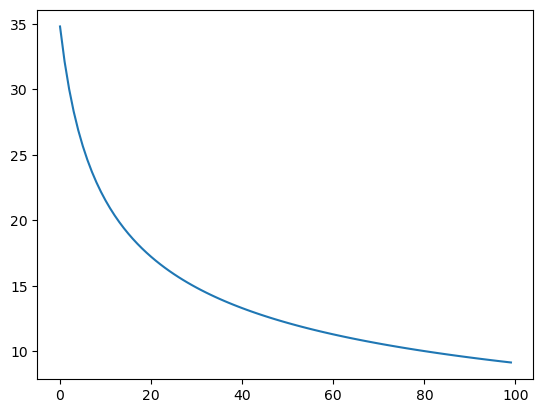

0.4264085479328663
0.29736462716738454
0.9104843569150679
0.006474510379890643
0.017226000718178716
0.263432021821566
0.7655581284394711
0.7291581798052212
0.3973265503531589
0.6891294265996872
0.07715652640555104
0.20651535768248616
0.10340745530488413
0.5494042746059952
0.4409148446229183
0.05650334350289583
0.007790768214790644
0.4548723081376712
0.19636966197379993
0.5234813737403193
0.19013228794005727
0.20148048992408615
0.1850458564657867
0.00841158485375777
0.3785660060613193
0.41339415816967806
0.11410888444082291
0.026798231719645318
0.12664885017240562
0.053306391284950176
0.6694064414759983
0.5190054153266895
0.8983070916363991
0.06992189642298695
0.1394507560484847
0.8024276946393815
0.5939547160385377
0.4403574639167199
0.7352770969010571
0.48672044031678485
0.7139265429120061
0.2501130054646643
0.13502057880652735
0.12253826402080112
0.2916083222981246
0.08944621053848634
0.12806635322304824
0.2065323884577806
0.28189901745201884
0.20220316375381028
0.4019006433622384
0.

In [43]:
lambda1 = np.transpose(np.full(11, 0.01))
d = 10
N = 100
D = generateData(d, N)
x_trainning, x_testing, y_traning, y_testing = split(D, 50)
eta = 0.01
epoch = []
itterations = 5
tryInit = [np.random.randn(len(x_trainning[0]))for m in range(5)]

par,obj = train(lambda1,eta,100,(x_trainning,y_traning))
print(obj)
import matplotlib.pyplot as plt
plt.plot(obj)
plt.show()

for init in tryInit:
    par, values = train(init, eta, itterations, (x_trainning, y_traning))
    epoch.append((par, values))

In [44]:
def ER(par, data):
    ER = 0
    X, Y = data
    for n in range(0, len(D) - 1):
        x, y = X[n], Y[n]
        yHat = model(x, par[n])
        s = 1 * (y != yHat)
        ER = ER + s
    return ER / len(data)

In [45]:
ERs = []
for i in epoch:
    ERs.append(ER(i, (x_testing, y_testing)))
print(ERs)

[0.5, 0.5, 0.5, 0.5, 0.5]


Question 2

In [46]:
import pandas as pd

In [47]:
data = pd.read_csv("CarsDataSetForCW1.csv",sep =",")
Z = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].to_numpy()
Y = 1 * (Z[:, 0] >= np.mean(Z[:, 0]))
X, Y = Z[:, 1 :], Y
print(Z)

[[ 18.    8.  307.  ...  12.   70.    1. ]
 [ 15.    8.  350.  ...  11.5  70.    1. ]
 [ 18.    8.  318.  ...  11.   70.    1. ]
 ...
 [ 32.    4.  135.  ...  11.6  82.    1. ]
 [ 28.    4.  120.  ...  18.6  82.    1. ]
 [ 31.    4.  119.  ...  19.4  82.    1. ]]


In [48]:
D_train = (X[:len(data)//2], Y[:len(data)//2])
D_test = (X[len(data)//2:], Y[len(data)//2:])

In [49]:
D_train_normalised = ((D_train[0] - np.average(D_train[0])) / np.std(D_train[0]), D_train[1])
print(D_train_normalised)
D_test_normalised = ((D_test[0] - np.average(D_test[0])) / np.std(D_test[0]), D_test[1])
print(D_test_normalised)
lambda1 = np.transpose(np.full(198, 0.01))
d = 10
N = 100
D = generateData(d, N)


x_testing=D_test_normalised[0]
y_testing=D_test_normalised[1]
x_trainning=D_train_normalised[0]
y_traning=D_train_normalised[1]

eta = 0.01
epoch = []
itterations = 5
# tryInit = [np.random.randn(len(X[0]))for m in range(5)]
for i in range(0, itterations):
    par, values = train(np.random.normal(0, 1, len(x_trainning)), eta, itterations, (x_trainning, y_traning))
    epoch.append((par, values))
ERs = []
for i in epoch:
    ERs.append(ER(i, (x_testing, y_testing)))
print(ERs)

(array([[-0.44347148, -0.18249136, -0.33698461, ..., -0.43998011,
        -0.3893552 , -0.44958138],
       [-0.44347148, -0.1449591 , -0.3064351 , ..., -0.44041653,
        -0.3893552 , -0.44958138],
       [-0.44347148, -0.17289009, -0.31952775, ..., -0.44085295,
        -0.3893552 , -0.44958138],
       ...,
       [-0.44696285, -0.37626255, -0.40506638, ..., -0.43107711,
        -0.38411814, -0.44958138],
       [-0.44696285, -0.36491559, -0.39808363, ..., -0.43116439,
        -0.38411814, -0.44958138],
       [-0.44696285, -0.37189834, -0.3893552 , ..., -0.43805985,
        -0.38411814, -0.44870854]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 198 is different from 7)